# Klyngeanalyse - en verden af mønstre

I dag skal vi snakke om **klyngeanalyse**;

Klyngeanalyse er et redskab til at finde system i al mulig data - det kan være ustruktureret data man ikke kan finde rundt i eller det kan være data der, på den ene eller anden måde, kunne tænkes at have et "system" i sig.

Vi vil, med andre ord, gerne på opdagelse i data og vi vil gerne finde ukendte sammenhænge og systemer ved at gruppere data. Vi gider ikke finde det manuelt og oftest kan vi slet ikke - der er alt for meget støj og rod til, at vi kan overkomme det.

Klyngeanalyse er en KÆMPE paraplybetegnelse for samtlige analyser, der benytter sig af algoritmer til at lave grupperinger.

Berømte der er pjattede med klyngeanalyse:

![tech-giants](https://4.bp.blogspot.com/-X7BHS66c1U8/UlX7OcLfnWI/AAAAAAAABnU/83lHDaDPeng/s1600/logos.png)

Hvorfor er de pjattede med klyngeanalyse?

Fordi der er penge i skidtet - en veludført klyngeanalyse kan hjælpe med at isolere de vigtige kunder, øge chancerne for mersalg drastisk og introducere specifikke segmenter til et særligt udvalg af produkter.

![old](https://www.fish-marketing.com/site/wp-content/uploads/2018/01/blog.jpg)

Det første vi ALTID gør er at importere vores pakker. For fornuftig pakkehåndtering er der ikke noget værre end at importere pakker løbende - hvis vi har brug for en mere, så tilføjer vi det i nedenstående felt og kører det igen. Hvis der er random imports alle mulige steder mister vi total overblikket og kan ikke længere huske, hvor pokker vi importerer et eller andet, der måske konflikter med noget vi har brug for. Imports bor sammen. Imports elsker at have selskab af alle de andre imports. Næste gang du tilføjer en import midt i din notebook, så tænk på hvor ensom den bliver - helt alene for **forladt**

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

Ovenstående er:

Dem vi kender:
* Pandas
* Matplotlib

Dem vi ikke kender:
* Scikit-learn (her sklearn)
* Scipy

De nye legekammerater er begge to pakker til videnskabelig, computationel metode.

*Scipy* er en magisk pakke - lidt ligesom numpy - som indeholder helt vildt mange funktioner brugt af matematikere, men det tilbyder også værktøjer til os dødelige.

*Scikit-learn* er en pakke specifikt designet til machine learning før pakker som *Tensorflow/Keras* og *PyTorch* overtog scenen. Hvor de sidstnævnte har voldsomt fokus på de superviserede maskinlæringstyper (Support Vector Machines, Random Forrests, Neurale Netværk), så har Scikit-Learn et godt miks af alt muligt og er klart en af de bedste biblioteker til klyngeanalyser. 

Vi bruger ikke Seaborn i dag - de døjer voldsomt med dendogrammer, som praktisk talt er den eneste ting vi kan bruge i dag ift. grafik.

Data til i dag er en klassiker i socialvidenskab; værdiundersøgelsen (... godt nok fra 1999, men den er så intuitiv at arbejde med, så vi forsøger os lidt frem).

Data ligger på nedenstående link - bemærk, at der også er et repository til min Svend Brinkmann generator som i meget gerne må lege løs med.

In [2]:
df=pd.read_csv("https://github.com/RolfLund/DDF/raw/main/data.csv")

In [3]:
df.head()

,gender,income,criminals,diffrace,leftwings,alcoholics,rightwings,manykids,neurotics,muslims,imigrants,aids,addicts,homoseksuals,jews,gypsies,age,edu,id
0,2,900000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48,4,1
1,1,180000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,30,4,2
2,1,600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,3,3
3,2,180000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,55,0,4
4,2,60000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,0,5


## Turbo-øvelse og et brush-up;

- Undersøg data med særlig henblik på at finde ud af, om vi selv kan danne et overblik over, om der er nogle grupper der ikke kan lide at bo ved siden af nogle af de grupperinger der er defineret i vore dataframe.
- Hvilke værktøjer har vi til rådighed fra sidst som kunne hjælpe os lidt?

In [5]:
df.groupby(["edu", "gender"]).mean()

income  criminals  diffrace  leftwings  alcoholics  \
edu gender                                                              
0   1       312434.343434   0.292929  0.060606   0.070707    0.262626   
    2       295356.433071   0.346457  0.094488   0.078740    0.409449   
1   1       395940.289941   0.313609  0.112426   0.112426    0.337278   
    2       342100.000000   0.320000  0.070000   0.050000    0.310000   
2   1       401923.076923   0.269231  0.076923   0.346154    0.423077   
    2       366679.245283   0.490566  0.094340   0.037736    0.396226   
3   1       425056.603774   0.216981  0.066038   0.113208    0.386792   
    2       466536.742424   0.280303  0.022727   0.075758    0.340909   
4   1       452495.918367   0.326531  0.040816   0.102041    0.469388   
    2       470897.435897   0.153846  0.000000   0.051282    0.384615   

            rightwings  manykids  neurotics   muslims  imigrants      aids  \
edu gender                                                                   
0   1         0.131313  0.010101   0.111111  0.161616   0.121212  0.040404   
    2         0.157480  0.055118   0.133858  0.251969   0.188976  0.118110   
1   1         0.165680  0.011834   0.124260  0.278107   0.118343  0.071006   
    2         0.160000  0.040000   0.120000  0.120000   0.130000  0.020000   
2   1         0.269231  0.153846   0.269231  0.192308   0.115385  0.038462   
    2         0.283019  0.037736   0.207547  0.169811   0.132075  0.037736   
3   1         0.301887  0.056604   0.132075  0.122642   0.056604  0.028302   
    2         0.234848  0.030303   0.159091  0.053030   0.053030  0.030303   
4   1         0.367347  0.061224   0.183673  0.040816   0.040816  0.102041   
    2         0.256410  0.025641   0.128205  0.000000   0.000000  0.025641   

             addicts  homoseksuals      jews   gypsies        age          id  
edu gender                                                                     
0   1       0.575758      0.131313  0.030303  0.131313  47.242424  443.404040  
    2       0.606299      0.110236  0.047244  0.212598  51.055118  454.803150  
1   1       0.568047      0.136095  0.047337  0.207101  47.224852  450.544379  
    2       0.560000      0.030000  0.000000  0.130000  45.680000  445.410000  
2   1       0.576923      0.076923  0.000000  0.115385  42.115385  434.807692  
    2       0.641509      0.037736  0.018868  0.188679  45.000000  488.113208  
3   1       0.594340      0.037736  0.018868  0.103774  44.698113  475.150943  
    2       0.598485      0.015152  0.000000  0.113636  41.545455  438.598485  
4   1       0.612245      0.102041  0.020408  0.102041  42.877551  469.938776  
    2       0.666667      0.000000  0.000000  0.076923  38.666667  375.564103

NameError: name 'x' is not defined

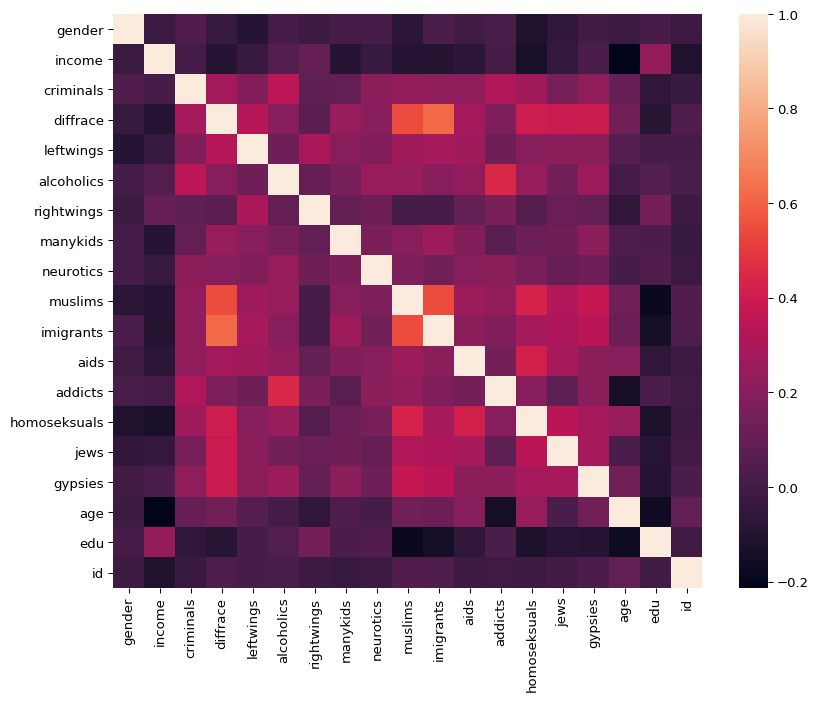

In [6]:
plt.figure(figsize=[10,8], dpi= 95)
 
ax = sns.heatmap(df.corr(), annot= False)
bottom, top = ax.get_ylim()
x.set_ylim(bottom + .5, top - .5)
plt.title('Correlation Between Columns', fontsize= 14, color= 'blue')

Text(0.5, 1.0, 'Frygt for nabo af anden etnisk herkomst')

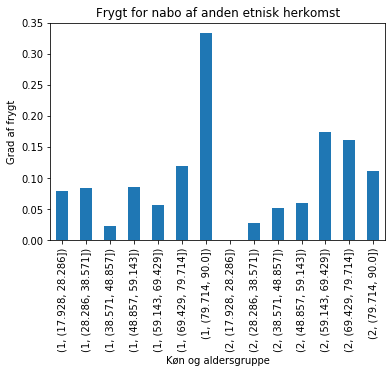

In [9]:
df['agecat'] = pd.cut(df['age'], 7)
grouped_df = df.groupby(['gender', 'agecat']) #gruppering efter gender og agecat
grouped_df['diffrace'].mean().plot.bar() #Nabo af anden etnisk herkomst
plt.xlabel('Køn og aldersgruppe')
plt.ylabel('Grad af frygt')
plt.title('Frygt for nabo af anden etnisk herkomst')



# En mere automatiseret version


Vi har nu erfaret, at der i hvert fald er en eller anden forskel, men vi vil gerne automatisere det lidt. Måske endda lege et en usuperviseret machinelearning-form kaldet Klyngeanalyse!

Der er to overordnede ting vi skal forholde os til før vi gør noget som helst smart med computere. Vi skal forholde os til:

<h2><center>Afstand</center></h2>
<h2><center>Sammenlægning</center></h2>

Vi starter med afstand. Afstand er, i sin kerne, super simpelt. Hvor langt er der fra person 1's svar til person 2's?

Hvis vi leger, at et spørgsmål her kunne være: "På en skala fra 1 til 5, hvor godt kan du så lide jordbæris?"

Personernes svar er her:

|Person  |Jordbæris|
|--------|---------|
|Person 1|4        |
|Person 2|5        |

Hvad er så afstanden mellem 4 og 5? 1!

Det samme kan vi gøre hvis vi tilføjer flere personer, men så bliver det også tydeligere, at tabellen med afstande hurtigt bliver stor.

|Person  |Jordbæris|
|--------|---------|
|Person 1|4        |
|Person 2|5        |
|Person 3|2        |

Og igen endnu større hvis vi tager flere spørgsmål med:

|Person  |Jordbæris|Chokoladeis|
|--------|---------|-----------|
|Person 1|4        |4          |
|Person 2|5        |3          |
|Person 3|2        |5          |


Det bliver meget hurtigt super uoverskueligt og vi skal til at forholde os til, at data også får flere dimensioner. Ved afstand til et spørgsmål ser en matrice med bare 6 personer sådan her ud:

![matrix](https://people.revoledu.com/kardi/tutorial/Clustering/image/Numerical%20Example_clip_image004.jpg)

Ved 2 spørgsmål får vi pludselig:

![multimatrix](https://i.stack.imgur.com/EQOra.png)

Og ved flere begynder vores hjerne ikke længere at kunne rumme hvad pokker det er der foregår... i hvert fald ikke visuelt.

Det vi skal vide er, at jo flere spørgsmål, jo større bliver vores matrice fordi vi skal udregne afstande fra hver persons svar på hvert spørgsmål i datasættet til samtlige andre persons svar på spørgsmål.

Anden forhindring; kan i huske da jeg sagde, at afstanden mellem 4 og 5 var 1? Det er den (ca.), hvis vi bruger det mest gængse mål for afstand; euklidisk afstand: 


![distance](https://wikimedia.org/api/rest_v1/media/math/render/svg/795b967db2917cdde7c2da2d1ee327eb673276c0)

Euklidisk afstand er også kaldet "fugleflugt" fordi afstanden er det samme som en streg mellem de to punkter vi ønsker at finde.

De absolut mest gængse mål for afstand er euklidisk afstand og $euklidisk^2$. Eneste forskel er her, at den afstand vi finder mellem to svar er følgende; hvis afstanden, som før, er mellem 4 og 5 (1) bliver resultatet $1^2=1$ mens afstanden mellem 2 og 5 bliver $3^2=9$

## Kort øvelse:

* Hvad er forskellen mellem at bruge $L$ og $L^2$ i praksis?
* Hvorfor tror i, at man kunne finde $L^2$ anvendelig og hvornår?



# Kort om typer af klyngeanalyser

Der findes to overordnede typer af klyngeanalyser
* Hierarkisk
* Ikke-hierarkisk

... jeg er godt med på, at den ene bare er en negation af den anden, men den har ikke et fedt navn :(

![hier](https://new.pharmacelera.com/wp-content/uploads/2019/08/clusters-1024x530.png)

Vi gider ikke at lege med ikke-hierarkiske klynger... det er poopy fordi vi skal definere antal klynger på forhånd og mister store dele af vores eksplorative tilgang til det, så den skipper vi helt.

Efter det skal vi forholde os til to forskellige måder at håndtere klyngedannelse på:

* Divisiv
* Agglomerativ

![divagg](https://cdn.educba.com/academy/wp-content/uploads/2019/11/Hierarchical-Clustering-Analysis.png)

Den ene bygger på en antagelse om, at data starter som en stor klump og skal splittes op (mest brugt ved en meget homogen masse) mens den anden starter med at anse hver komponent som unik og alt derefter bliver små sammenlægninger. Langt de fleste socialvidenskabere (der ikke har solgt sin sjæl til den ekstremt hurtige og noget mere brutale k-means) bruger agglomerativ, hierarkisk klyngeanalyse.

# Sammenlægning

Selve måden hvorpå klyngerne dannes er det andet store punkt i klyngeanalyse. Vi har afstandsmålene, men nu skal vi undersøge, om vi kan finde grupper af personer, der deler afstande og som er anderledes end andre grupper.

Alle metoderne er det der kaldes ”rekursive algoritmer” der starter med alle individerne, samler i et led indtil alle er placeret og gentager processen indtil X antal klynger er oprettet. Det der er unikt ved rekursive algoritmer er, at de hele tiden opdaterer sig i forhold til hvordan det ser ud efter hver eneste sammenlægning.

Der er massere af sammenlægningsformer, men de klassiske er:

![linkage](https://drek4537l1klr.cloudfront.net/rhys/v-7/Figures/CH17_FIG_3_MLR.png)

# What's the time?
![hammer](https://memegenerator.net/img/instances/42340727/stop-big-data-time.jpg)




Nu skal vi kigge lidt nærmere på, hvordan vi forholder os til data. Først gør vi to ting, som jeg lover vi forholder os til lidt senere (men bare gør uden at tænke over det lige nu) - vi laver et subset af data i to forskellige dataframes (weird, I know) men vi bruger vores X dataframe til at lave noget finurligt og vi laver en lidt weird ting vi kalder 
*linked*

Linked indeholder et sæt af forhold, der kan sige noget om typer af klynger når vi bruger Wards linkage. 

In [11]:
X = df[['criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies']]
X_1 = df[['criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies']]
linked = linkage(X, 'ward')

En repræsentation når vi har, forsigtigt, sagt til Python at vi gerne vil kigge på data via Ward ser sådan her ud:

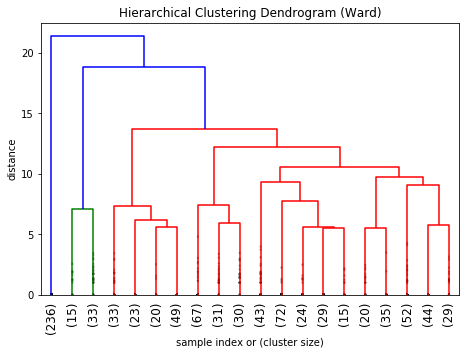

In [7]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

Okay, så vi har en nogenlunde idé om, at Ward hjælper os til at reducere kompleksiteten. Men... hvordan vælger vi?

Der er voldsomt mange forskellige måder at vælge på - herunder er en måde at teste de tre mest gængse metoder til at finde ud af, hvor mange klynger vi burde vælge.

In [8]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    df['cluster'+k]=labels

Cluster count- 2 |  db score- 1.14 |  ch score -  163.87 |  ss score -  0.19
Cluster count- 3 |  db score- 1.27 |  ch score -  169.06 |  ss score -  0.22
Cluster count- 4 |  db score- 1.7 |  ch score -  151.62 |  ss score -  0.26
Cluster count- 5 |  db score- 2.0 |  ch score -  141.16 |  ss score -  0.28
Cluster count- 6 |  db score- 2.08 |  ch score -  131.83 |  ss score -  0.31
Cluster count- 7 |  db score- 1.91 |  ch score -  124.82 |  ss score -  0.32
Cluster count- 8 |  db score- 1.83 |  ch score -  120.28 |  ss score -  0.34
Cluster count- 9 |  db score- 1.63 |  ch score -  117.46 |  ss score -  0.35
Cluster count- 10 |  db score- 1.59 |  ch score -  113.19 |  ss score -  0.37


En hurtig husker ift. de forskellige scores:

Davies Bouldin Score skal gerne være så lav som muligt
Calinski-Harabasz skal gerne være så høj som muligt
Silhouette-score går fra -1 til 1 og skal gerne være så høj som muligt

Selvom ovenstående kode ser lidt... ubehagelig ud, så er det ikke så slemt. Selve klyngeanalysen kræver ikke mere end:

In [9]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(X)
labels=cluster.labels_
df['cluster']=labels

Hvis vi stadig gerne vil udforske lidt, særligt fordi vores scores er lidt weird, så har jeg lavet en lille kode-snippet der fungerer på vores data og giver en bedre ide om, hvad hver klyngetype forsøger at fortælle os. I skal tænke jer selv som Timmy der forsøger at finde ud af, hvad Lassie siger til Jer... bortset fra at Lassie er et stykke Python-kode der har resulteret i nogle forskellige klynger.

![lassie](http://www.quickmeme.com/img/9b/9b5278957fb7cc4c74c218e67336089cb5211f488649153377474194f398e8ca.jpg)



... and the results for 2 clusters are!
cluster2              0          1
criminals          0.41       0.00
diffrace           0.09       0.00
leftwings          0.12       0.00
alcoholics         0.48       0.00
rightwings         0.29       0.00
manykids           0.05       0.00
neurotics          0.19       0.00
muslims            0.22       0.00
imigrants          0.14       0.00
aids               0.07       0.00
addicts            0.80       0.00
homoseksuals       0.10       0.00
jews               0.03       0.00
gypsies            0.20       0.00
age               44.66      48.15
income        386855.31  380311.02
edu                1.68       1.60

And the size of the clusters if there are 2 clusters are
cluster2
0    664
1    236
Name: id, dtype: int64

And if we have 2 clusters, the dendrogram looks like


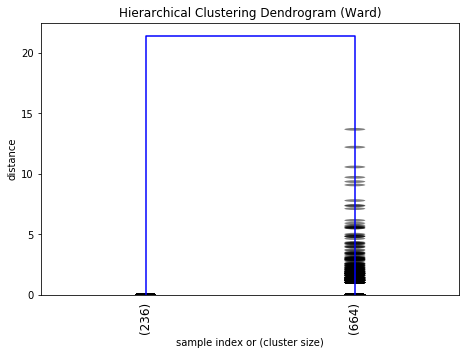



... and the results for 3 clusters are!
cluster3              0          1          2
criminals          0.37       0.00       0.90
diffrace           0.03       0.00       0.94
leftwings          0.09       0.00       0.56
alcoholics         0.45       0.00       0.90
rightwings         0.28       0.00       0.42
manykids           0.03       0.00       0.33
neurotics          0.17       0.00       0.50
muslims            0.16       0.00       0.98
imigrants          0.08       0.00       0.96
aids               0.05       0.00       0.38
addicts            0.79       0.00       0.96
homoseksuals       0.07       0.00       0.48
jews               0.01       0.00       0.27
gypsies            0.16       0.00       0.81
age               43.76      48.15      56.21
income        394456.21  380311.02  289310.42
edu                1.71       1.60       1.35

And the size of the clusters if there are 3 clusters are
cluster3
0    616
1    236
2     48
Name: id, dtype: int64

And if we ha

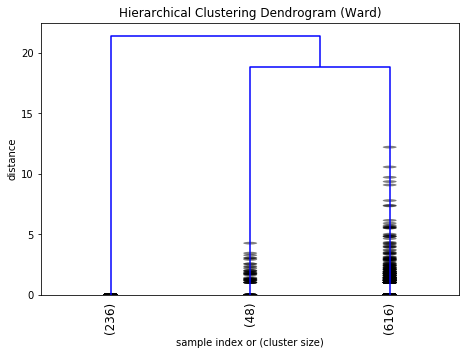



... and the results for 4 clusters are!
cluster4              0          1          2          3
criminals          0.41       0.23       0.90       0.00
diffrace           0.04       0.00       0.94       0.00
leftwings          0.04       0.26       0.56       0.00
alcoholics         0.50       0.28       0.90       0.00
rightwings         0.11       0.94       0.42       0.00
manykids           0.03       0.02       0.33       0.00
neurotics          0.21       0.00       0.50       0.00
muslims            0.19       0.02       0.98       0.00
imigrants          0.09       0.02       0.96       0.00
aids               0.06       0.00       0.38       0.00
addicts            0.82       0.69       0.96       0.00
homoseksuals       0.09       0.00       0.48       0.00
jews               0.02       0.00       0.27       0.00
gypsies            0.18       0.05       0.81       0.00
age               44.56      40.66      56.21      48.15
income        393295.37  399016.00  289310.42 

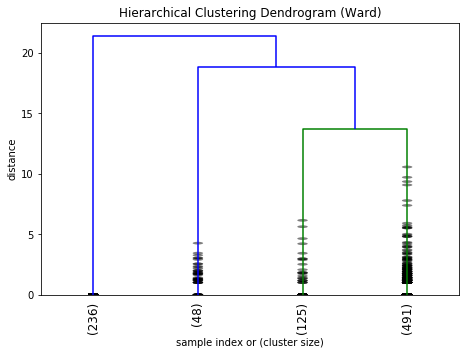



... and the results for 5 clusters are!
cluster5              0          1          2          3          4
criminals          0.25       0.87       0.90       0.00       0.23
diffrace           0.04       0.03       0.94       0.00       0.00
leftwings          0.03       0.09       0.56       0.00       0.26
alcoholics         0.37       0.86       0.90       0.00       0.28
rightwings         0.11       0.09       0.42       0.00       0.94
manykids           0.03       0.02       0.33       0.00       0.02
neurotics          0.18       0.29       0.50       0.00       0.00
muslims            0.15       0.30       0.98       0.00       0.02
imigrants          0.09       0.11       0.96       0.00       0.02
aids               0.02       0.18       0.38       0.00       0.00
addicts            0.76       0.97       0.96       0.00       0.69
homoseksuals       0.03       0.27       0.48       0.00       0.00
jews               0.02       0.02       0.27       0.00       0.00
gypsie

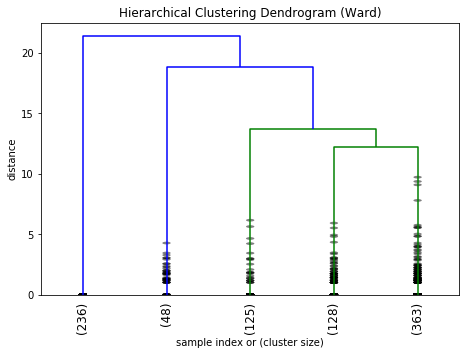

In [10]:
for i in range(2,6):
    i=str(i)
    X_1=df[['cluster'+i,'criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies', 'age', 'income', 'edu']]
    stuff=X_1.groupby(['cluster'+i]).mean()
    trans_stuff=stuff.T
    ts=round(trans_stuff,2)
    print("")
    print("")
    print('... and the results for' ,i, 'clusters are!')	
    print(ts)
    print("")
    count=df.groupby(['cluster'+i])['id'].count()
    print("And the size of the clusters if there are",i, "clusters are")
    print(count)
    print("")
    print("And if we have",i,"clusters, the dendrogram looks like")
    i=int(i)
    figure = plt.figure(figsize=(7.5, 5))
    dendrogram(
            linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=i,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    plt.show()

# Lang øvelse - you get to play!

Jeg har lavet et udtræk af værdiundersøgelsen med langt flere variable. Listen er nedenfor. Hvis ikke i kan læse skidtet her er listen også via følgende link:

https://www.dropbox.com/s/lc5go3nbi7tk07u/varlist.png?dl=0

Og i kan finde data her: https://github.com/RolfLund/DDF/raw/main/value99.csv

Alle variable er kodet sådan, at jo mere den ting der bliver spurgt om, jo mere mod 1 er det. 1 er derfor altid meget enig, ja eller mest af den ting de siger. Variable der er dikotome (1/2) er altid 1 for enig og to for uenig. Variable der er 1 til 5 gradueres sådan, at meget enig er 1 mens 5 er meget uenig i det udsagn der står.

Som eksempel: "Ønsker ikke drankere som nabo" --> 1=ønsker ikke, 2=ligeglad

Eller: Tillid til forsvaret --> 1=Meget stor tillid, 2= ret stor tillid, 3=Ikke ret stor tillid, 4=slet ingen tillid 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Bemærk, jeres opgave er at udvælge noget i er interesseret i og forsøge at lave nogle klynger på baggrund af jeres udvalgte variable.

Når i har lavet selve klyngeanalysen skal i forholde jer til, hvad det er for nogle klynger vi har lavet. Først;
- Hvad har de svaret i de ting klyngerne er baseret på?
- Giver det mening?

Dernæst:
- Brug andre variable til at forklare hvad det er der foregår. Hvad er gennemsnitsalderen? Er der skævhed i kønsfordeling? Kan vi sige noget interessant om dem ellers?